# The Heat Equation
- The model problem for the time-dependent PDE reads
$$
\begin{aligned}
\frac{\partial u}{\partial t} & =k(\mathbf{x},\omega)\nabla^2 u+f & & \text { in } \Omega \times(0, T], \\
u & =u_D=0 & & \text { in } \partial \Omega \times(0, T], \\
u & =u_0 & & \text { at } t=0 .
\end{aligned}
$$
- where
    - The variable $u$ is a function of both space and time, i.e., $u = u(\mathbf{x}, t)$, where the spatial domain is denoted by $\Omega(\mathbb{R}^{2})$.
    - The thermal diffusivity $\boldsymbol{x} \in \Omega=[-2,2] \times[-2,2]\subset \mathbb{R}^2$
    - The source function $f$ and boundary values $u_D$ may also vary with space and time.
    - The initial condition $u_0$ is defined in the spatial domain $\Omega(\mathbb{R}^{2})$.<br>

<br>

## Parameter Estimation Problem - Theory

Our uncertain paramater in this case is the thermal diffusivity $k(\mathbf{x})$.
Our observations consist of noisy observations of $u(x_j,t_i)$, that is, measurements of $u$ at locations $\{x_j\}_{j=1}^M$ in space and $\{t_i\}_{i=0}^{T}$ times.
Note that our parameter is now populated with noise that may be spatially varying and correlated.
Furthermore note that our uncertain parameter is now a function, and not just simple a point, so we need an effective way of parametrizing $k(\mathbf{x})$ for parameter estimation. 
This is where the KL expansion comes in


### The KL Expansion

We can describe $k(\boldsymbol{x})$ as a stochastic process, $K(\boldsymbol{x}, \omega)$, where $K$ is a function defined on the product
space $\boldsymbol{D} \times \Omega, \boldsymbol{x} \in \boldsymbol{D}$ is the index set of the location of the physical domain, and $\theta \in \Theta$ is
the sample space of the probability space, $(\Theta, \mathcal{F}, P)$.

Given a stochastic process $K(\boldsymbol{x}_{1}, \omega)$, with mean $\mu(\boldsymbol{x})$ and symmetric positive semi- 
definite covariance function $\boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right) \in \Omega \times \Omega \to 
\mathbb{R}$, the Mercer theorem states that $\boldsymbol{C}$ can be decomposed as:
$$
\boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right)=\sum_{j=1}^{\infty} \lambda_j \psi_j(\boldsymbol{x}) \psi_j\left(\boldsymbol{x}_{2}\right),
$$
where $\lambda_j>0$ are the eigenvalues of $\boldsymbol{C}$, and $\psi_j$ are the corresponding normalized eigenvectors. The eigenpairs satisfy the Fredholm equation of the second kind:
$$
\int_{\Omega} \boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right) \psi_j\left(\boldsymbol{x}_{2}\right) d \boldsymbol{x}_{2}=\lambda_j \psi_j(\boldsymbol{x}_{1}), \quad j=1,2, \ldots
$$
Sequencing the eigenvalues in decreasing order, any realization of $K$ can then be written as Ghanem and Spanos (2003)
$$
K(\boldsymbol{x}, \omega)=\mu(\boldsymbol{x})+\sum_{j=1}^{\infty} \sqrt{\lambda_j} \psi_j(\boldsymbol{x}) \xi_j(\omega) .
$$
The coordinate coefficients $\xi_j(\omega)$ can be deterministically computed by evaluating the integrals
$$
\xi_j(\omega)=\int(K(\boldsymbol{x}_{1}, \omega)-\mu(\boldsymbol{x})) \psi_j(\boldsymbol{x}) d \boldsymbol{x}
$$


### KL Expansion for Gaussian Processes

In our case, note $k(\mathbf{x})$ is a Gaussian process $(G P), \xi_j(\omega)$, i.e. it is a Gaussian-independent identically distributed random variables with zero mean and unit variance, such that $\mathbb{E}\left[\xi_j \xi_j^{\prime}\right]=$ $\delta_{j j^{\prime}}$.
The parameter field $K$ is then fully characterized by a set of coordinates $\xi_j$ 's given the eigenbasis is known.
By truncating the series givn above to retain the first few $K$ terms, the KL expansion efficiently approximates the highdimensional parameter field using a few dominant modes.
The size of the retained terms $K$ depends on the desired energy percentage to be retained by the $\mathrm{KL}$ expansion, which is defined as $\sum_{j=1}^K \lambda_j / \sum_{j=1}^{\infty} \lambda_j$.
In practice, it is preferable to choose $K$ such that the truncated $\mathrm{KL}$ expansion encapsulates as much information as possible with respect to its infinite counterpart.
Larger $K$ are required for prior covariance functions with smaller correlation lengths for the $\mathrm{KL}$ expansion to capture a similar information percentage.
There exist several strategies to set $K$ in practice.
For instance, for $\lambda_1 \geq \lambda_2 \geq \ldots$, one can control the representation error on $K$ by selecting $K$ such that $\lambda_K<c \lambda_1$ or $\sum_{j=1}^K \lambda_j \leq c \sum_{j=1}^{\infty} \lambda_j$ for some truncation parameter $c \ll 1$

### Creating the Covariance Matrix

The one thing remaining is to determine the Covariance function $C(x_1, x_2)$ for determining the modes of our KL basis.
The covariance function encodes how correlated spatially we expect our function values to be.
A common kernel used as a Covariance function is based off a square exponential function.

The square exponential kernel function can be represented mathematically as:

$$C(x_i, x_j) = \exp \left( -\frac{1}{2} \sum_{d=1}^{D} \left(\frac{x_{i,d} - x_{j,d}}{\ell_d}\right)^2\right)$$

where $x_i$ and $x_j$ are two $D$-dimensional input vectors, $\ell_d$ is the length scale for dimension $d$ and $\alpha=2$ is a constant.
The covariance matrix, $C$, can be constructed by evaluating this kernel function for each pair of input points and multiplying byhe $\sigma^2$:

$$ C_{i,j} = \sigma^2 * C(x_i, x_j) $$

Note the standard deviation can be specified to be constant over the whole grid, or can be the same size of the grid and specified cell wise. 
The $\sigma$ set should be related to the expected measurement noise in the observation operator.
Note furthermore the importance of the length scale parameters $\ell_d$. 
They in a sense define how smooth we believe our kernel to be.
The large $\ell_d$, the more square exponential kernel will smooth the sum of the different components over the space since they will overlap more.
The smaller the $\ell_d$, the rougher the field we want to represent.

### Forward Model - FEM Formulation

We will use a finite element method to solve the heat equation forward model in our parameter estimation problem. 


- The finite element method is a popular approach for solving time-dependent partial differential equations (PDEs).
- A common technique for discretizing the time derivative involves a finite difference approximation, which leads to a sequence of stationary problems.
- Each of these stationary problems can then be formulated as a variational problem, leading to a set of algebraic equations to solve at each time step.
- To represent quantities at different time levels, we adopt the notation of superscript $n$, where $n$ is an integer counting time levels. For instance, $u^n$ refers to the value of the solution $u$ at time level $n$.
- In the context of finite difference discretization, the initial step involves evaluating the PDE at a particular time level, such as $t_{n+1}$. This allows us to formulate a set of equations that define the solution at the next time step.
- The time-derivative can be approximated by a difference quotient. For simplicity and stability reasons, we choose a simple backward difference, given $\Delta t$ is the time discretization parameter:

$$\left(\frac{\partial u}{\partial t}\right)^{n+1}=\nabla^2 u^{n+1}+f^{n+1} \ \implies \ \left(\frac{\partial u}{\partial t}\right)^{n+1} \approx \frac{u^{n+1}-u^n}{\Delta t}$$

- Inserting the latter expression into our equation at time step $n+1$ yields
$$
\frac{u^{n+1}-u^n}{\Delta t}= k(\mathbf{x})\nabla^2 u^{n+1}+f^{n+1} .
$$

- To solve time-dependent partial differential equations, we typically first discretize the time derivative using a finite difference approximation.
- This results in a sequence of stationary problems that can be solved iteratively to obtain the solution at each time step.
- We can reorganize the resulting equations such that the left-hand side contains only terms with the unknown value $u^{n+1}$, while the right-hand side contains only computed terms.
- This leads to a sequence of stationary problems for $u^{n+1}$, which can be solved assuming that the value of $u^n$ is known from the previous time step.
$$
\begin{aligned}
u^0 & =u_0 \\
u^{n+1}-\Delta t k(\mathbf{x}) \nabla^2 u^{n+1} & =u^n+\Delta t f^{n+1}, \quad n=0,1,2, \ldots
\end{aligned}
$$
Hence given $u_0$, we can iterativly solve $u^0, u^1, u^2, \dots$

- After discretizing the time derivative using a finite difference approximation, we can solve the resulting sequence of stationary problems using the finite element method.
- To do this, we first transform the equation into its weak formulation.
- We do this by multiplying the equation by a test function $v \in \hat{V}$ and integrating the second-order derivatives by parts.
- We then introduce the symbol $u$ to represent the unknown value $u^{n+1}$, and we write the resulting weak formulation in terms of $u$ and $v$.
$$
a(u, v)=L_{n+1}(v),
$$
where
$$
\begin{aligned}
a(u, v) & =\int_{\Omega}(u v+\Delta t k(\mathbf{x}) \nabla u \cdot \nabla v) \mathrm{d} x \\
L_{n+1}(v) & =\int\left(u^n+\Delta t f^{n+1}\right) \cdot v \mathrm{~d} x
\end{aligned}
$$

## Simple Example Solving

The `HeatModel` class allows us to define the parameters of the heat model.

Lets start with a constant $k(\mathbf{x})$ over the space.
Note we define it as a product of two variables, x and y, corresponding to the (x,y) coordinate of each grid point in the grid to compute the thermal diffusivity over.

In [3]:
import importlib
from pydci.examples import heat_model as hm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## True k(x) fields

### Test Function 

We make assumptions $\mu_{therm} = 2.0$ and $\xi = 0.5$ for the thermal mean and noise of the true field respectively. 

Now consider the test functions:

- Functional form of $k(x)$:
$$k(\boldsymbol{x}) = \mu_{therm} + (\mu_{therm} * \xi) \sin(\boldsymbol{x}_{0}-1.0)\cos(\boldsymbol{x}_{1} - 1.0)* \exp\left[-2 \left( \left(\frac{\boldsymbol{x}_{0}-1.0}{\sigma}\right)^{2} + \left(\frac{\boldsymbol{x}_{1}-1.0}{\sigma}\right)^{2} \right) \right].$$

- Constant form of $k(x)$:
$$ k(\boldsymbol{x}) = \mu_{therm} + (\mu_{therm} * 0.1 * \varepsilon ) * \mathbf{1} \quad \text{with } \mathbf{1}\in \mathbb{R}^{N}, \ \varepsilon \sim \mathcal{N}(0,1)$$



In [4]:
therm_mean = 1
noise = 0.1


def test_fun(x):
    """
    Functional k(x) that varies with x
    """
    scale = 10.0
    center = [1.0, 1.0]
    m = therm_mean * noise  # * np.random.randn(1)
    init = therm_mean + m * np.sin(x[0] - center[0]) * np.cos(
        x[1] - center[1]
    ) * np.exp(
        -2.0 * (((x[0] - center[0]) / scale) ** 2 + ((x[1] - center[1]) / scale) ** 2)
    )
    return init

In [5]:
def const_k(x):
    """
    Constant k(x)
    """
    m = therm_mean + therm_mean * noise * np.random.randn(1)
    return m * np.ones(x[0].shape)

## Initial Conditions

- First Initial Condition: 
$$\exp\left[-\frac{1}{2} \left(\left(\frac{\boldsymbol{x}_{0}-0.01}{5}\right)^{2} + \left(\frac{\boldsymbol{x}_{1}-0.01}{5}\right)^{2} \right) \right]$$
- Second Inital Condition:
$$2* \exp\left[-0.1\left( \left(\boldsymbol{x}_{0}-1.0\right)^{2} + \left(\boldsymbol{x}_{1}-1.0\right)^{2} \right) \right]$$

In [6]:
def init_cond(x):
    return np.exp(-0.5 * ((x[0] - 0.01) / 5) ** 2 + ((x[1] + 0.01) / 5) ** 2)


def init_cond(x):
    return 2.0 * np.exp(-0.1 * ((x[0] - 1.0) ** 2 + (x[1] - 1.0) ** 2))

### Forming Problem

In [4]:
import importlib
from pydci.examples import heat_model as hm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from pydci.log import enable_log

enable_log()

therm_mean = 1
noise = 0.1


def init_cond(x):
    return np.exp(-0.5 * ((x[0] - 0.01) / 5) ** 2 + ((x[1] + 0.01) / 5) ** 2)


def init_cond(x):
    return 2.0 * np.exp(-0.1 * ((x[0] - 1.0) ** 2 + (x[1] - 1.0) ** 2))


def const_k(x):
    """
    Constant k(x)
    """
    m = therm_mean + therm_mean * noise * np.random.randn(1)
    return m * np.ones(x[0].shape)


np.random.seed(123)

importlib.reload(hm)

hm = hm.HeatModel()
pi_in, samples = hm.get_uniform_initial_samples(num_samples=10, scale=0.5)
hm.forward_solve(0.1, samples=samples)
hm.plot_states()

[04/27/23 19:15:07] INFO     Logger initialized                                                           ]8;id=17599;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=975176;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    WARNING  Pyvista not found                                                     ]8;id=383810;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=414009;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/examples/heat_model.py#24\24]8;;\

[04/27/23 19:15:13] INFO     Drawing 10 from uniform at:                                               ]8;id=369071;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=720821;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#254\254]8;;\
                                     loc: [-1.6284459   0.49867272  0.14148925 -2.25944207]                        
                                     scale: [1.0856306  0.99734545 0.2829785  1.50629471]                          

INFO:root:running build_ext
INFO:root:building 'libffcx_forms_24497c5d8ef7b331c1e1b57acbe9b4143a55fa55' extension
INFO:root:/opt/conda/envs/fenics/bin/x86_64-conda-linux-gnu-cc -Wno-unused-result -Wsign-compare -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/conda/envs/fenics/include -fPIC -O2 -isystem /opt/conda/envs/fenics/include -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /opt/conda/envs/fenics/include -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /opt/conda/envs/fenics/include -fPIC -I/opt/conda/envs/fenics/lib/python3.10/site-packages/ffcx/codegeneration -I/opt/conda/envs/fenics/include/python3.10 -c libffcx_forms_24497c5d8ef7b331c1e1b57acbe9b4143a55fa55.c -o ./libffcx_forms_24497c5d8ef7b331c1e1b57acbe9b4143a55fa55.o -O2 -g0
INFO:root:/opt/conda/envs/fenics/bin/x86_64-conda-linux-gnu-cc -shared -Wl,--allow-shlib-undefined -Wl,-rpath,/opt/conda/envs/fenics/lib -Wl,-rpath-link,/opt/conda/envs/fenics/lib

[04/27/23 19:15:14] INFO     end_point: 0.0, [ 0.05513619  0.02910119  0.09927572 ... -0.02603406      ]8;id=65820;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=862851;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#171\171]8;;\
                             -0.06600982                                                                           
                              -0.06337304]                                                                         

on 0: > /home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py(192)forward_solve()
          190                 for j, s in enumerate(samples):
          191                     pdb.set_trace()
      --> 192                     push_forwards[j, :, :] = self.forward_model(
          193                             samples_x0[j], ts, tuple(s))[
          194                                     sample_ts_idxs][:, self.state_idxs]
      
Solving model sample set: |                    | ▆▄▂ 0/10 [0%] in 12s (~0s, 0.0/

ipdb>  n


on 0: > /home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py(193)forward_solve()
          191                     pdb.set_trace()
          192                     push_forwards[j, :, :] = self.forward_model(
      --> 193                             samples_x0[j], ts, tuple(s))[
          194                                     sample_ts_idxs][:, self.state_idxs]
          195                     bar()
      
Solving model sample set: |                    | ▃▅▇ 0/10 [0%] in 13s (~0s, 0.0/

ipdb>  


on 0: > /home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py(192)forward_solve()
          190                 for j, s in enumerate(samples):
          191                     pdb.set_trace()
      --> 192                     push_forwards[j, :, :] = self.forward_model(
          193                             samples_x0[j], ts, tuple(s))[
          194                                     sample_ts_idxs][:, self.state_idxs]
      
Solving model sample set: |                    | ▂▂▄ 0/10 [0%] in 14s (~0s, 0.0/

ipdb>  


on 0: > /home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py(194)forward_solve()
          192                     push_forwards[j, :, :] = self.forward_model(
          193                             samples_x0[j], ts, tuple(s))[
      --> 194                                     sample_ts_idxs][:, self.state_idxs]
          195                     bar()
          196 
      
Solving model sample set: |                    | ▆█▆ 0/10 [0%] in 46s (~0s, 0.0/

ipdb>  test = self.forward_model(samples_x0[j], ts, tuple(s))


Solving model sample set: |                    | ▇▇▅ 0/10 [0%] in 49s (~0s, 0.0/

ipdb>  test.shape


on 0: (1000, 2601)                                                              
Solving model sample set: |                    | ▃▅▇ 0/10 [0%] in 57s (~0s, 0.0/

ipdb>  self.state_idxs


on 0: array([  12,   18,   21,   24,   25,   26,   33,   43,   45,   50,   58,  
               63,   75,   85,  103,  108,  110,  116,  127,  129,  132,  141,
              148,  167,  179,  184,  189,  190,  196,  206,  207,  208,  215,
              220,  221,  222,  224,  235,  239,  242,  243,  249,  252,  256,
              257,  263,  266,  270,  289,  304,  310,  315,  319,  327,  328,
              335,  336,  343,  353,  354,  364,  368,  379,  380,  381,  383,
              395,  402,  403,  417,  420,  423,  429,  431,  439,  440,  449,
              466,  471,  476,  477,  493,  498,  501,  502,  511,  518,  524,
              537,  553,  554,  556,  558,  563,  569,  576,  589,  590,  591,
              594,  597,  601,  610,  613,  616,  618,  621,  627,  632,  633,
              638,  641,  645,  646,  647,  649,  658,  667,  671,  673,  675,
              680,  682,  683,  689,  693,  698,  704,  706,  707,  709,  714,
              715,  717,  730,  732,  734,  742,  

ipdb>  c


on 1: > /home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py(192)forward_solve()
          190                 for j, s in enumerate(samples):
          191                     pdb.set_trace()
      --> 192                     push_forwards[j, :, :] = self.forward_model(
          193                             samples_x0[j], ts, tuple(s))[
          194                                     sample_ts_idxs][:, self.state_idxs]
      
Solving model sample set: |██                  | ▂▄▆ 1/10 [10%] in 1:28 (~13:04,

ipdb>  c


on 2: > /home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py(192)forward_solve()
          190                 for j, s in enumerate(samples):
          191                     pdb.set_trace()
      --> 192                     push_forwards[j, :, :] = self.forward_model(
          193                             samples_x0[j], ts, tuple(s))[
          194                                     sample_ts_idxs][:, self.state_idxs]
      
Solving model sample set: |████                | ▅▇▇ 2/10 [20%] in 1:30 (~9:29, 

ipdb>  q


Solving model sample set: |████⚠︎               | (!) 2/10 [20%] in 1:30.3 (0.02/


In [49]:
heat_model.probs[-3].split_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2   
split nc qoi_comb                                                        
0     1  0         1.043938  0.115505  -1.265508   1.039203   0.305632  \
      2  0         1.048229  0.340352  -0.963604   1.148999   0.157790   
      3  0         1.039549  0.601000  -1.101484   1.195382   0.164571   
      4  0         0.914400  1.083075  -0.768401   0.763326   0.357243   

                   lam_MUD_3  predict_delta  within_thresh  closest  max_kl   
split nc qoi_comb                                                             
0     1  0         -2.150349       0.043938           True    False   False  \
      2  0         -1.678280       0.048229           True    False   False   
      3  0         -0.950318       0.039549           True     True   False   
      4  0         -1.020159       0.085600           True    False    True   

                   min_kl  
split nc qoi_comb          
0     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False

In [48]:
heat_model.probs[-2].split_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2   
split nc qoi_comb                                                        
0     1  0         0.716498  0.056122  -1.031071   0.638702   0.273411  \
      2  0         0.256329  0.170098  -1.607006   0.855055   0.253034   
      3  0         0.064407  0.374810  -1.534678   0.355471   0.373193   
      4  0         0.028375  0.350474  -1.534678   0.355471   0.373193   

                   lam_MUD_3  predict_delta  within_thresh  closest  max_kl   
split nc qoi_comb                                                             
0     1  0         -1.455533       0.283502           True     True    True  \
      2  0         -1.691226       0.743671          False    False   False   
      3  0         -1.098824       0.935593          False    False   False   
      4  0         -1.098824       0.971625          False    False   False   

                   min_kl  
split nc qoi_comb          
0     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False

In [13]:
heat_model.probs[-1].split_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2   
split nc qoi_comb                                                        
0     1  0         0.598889  0.111133  -1.338692   0.958682   0.106692  \
      2  0         0.350337  0.131322  -1.338692   0.958682   0.106692   
      3  0         0.200946  0.132993  -1.193794   1.205631   0.377864   
      4  0         0.092462  0.158976  -1.338692   0.958682   0.106692   

                   lam_MUD_3  predict_delta  within_thresh  closest  max_kl   
split nc qoi_comb                                                             
0     1  0         -1.487782       0.401111           True     True    True  \
      2  0         -1.487782       0.649663          False    False   False   
      3  0         -1.558878       0.799054          False    False   False   
      4  0         -1.487782       0.907538          False    False   False   

                   min_kl  
split nc qoi_comb          
0     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False

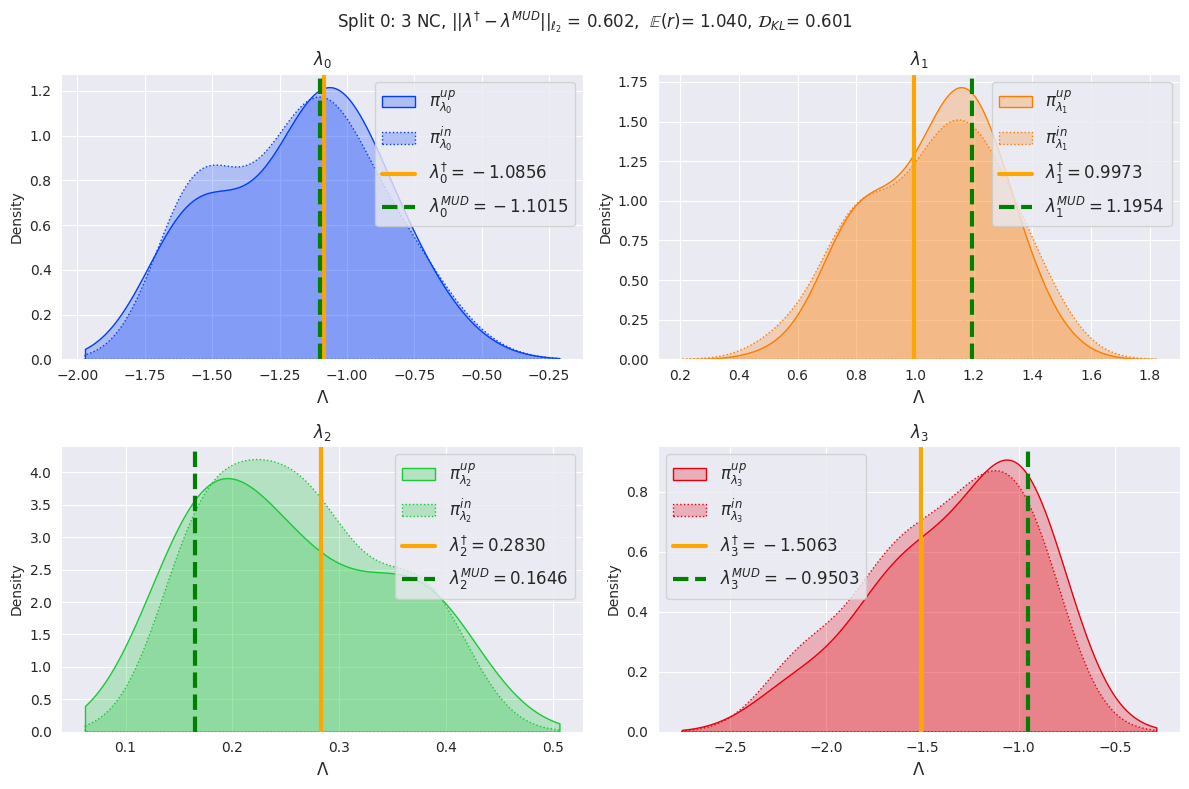

In [30]:
heat_model.probs[0].param_density_plots(lam_true=heat_model.lam_true)

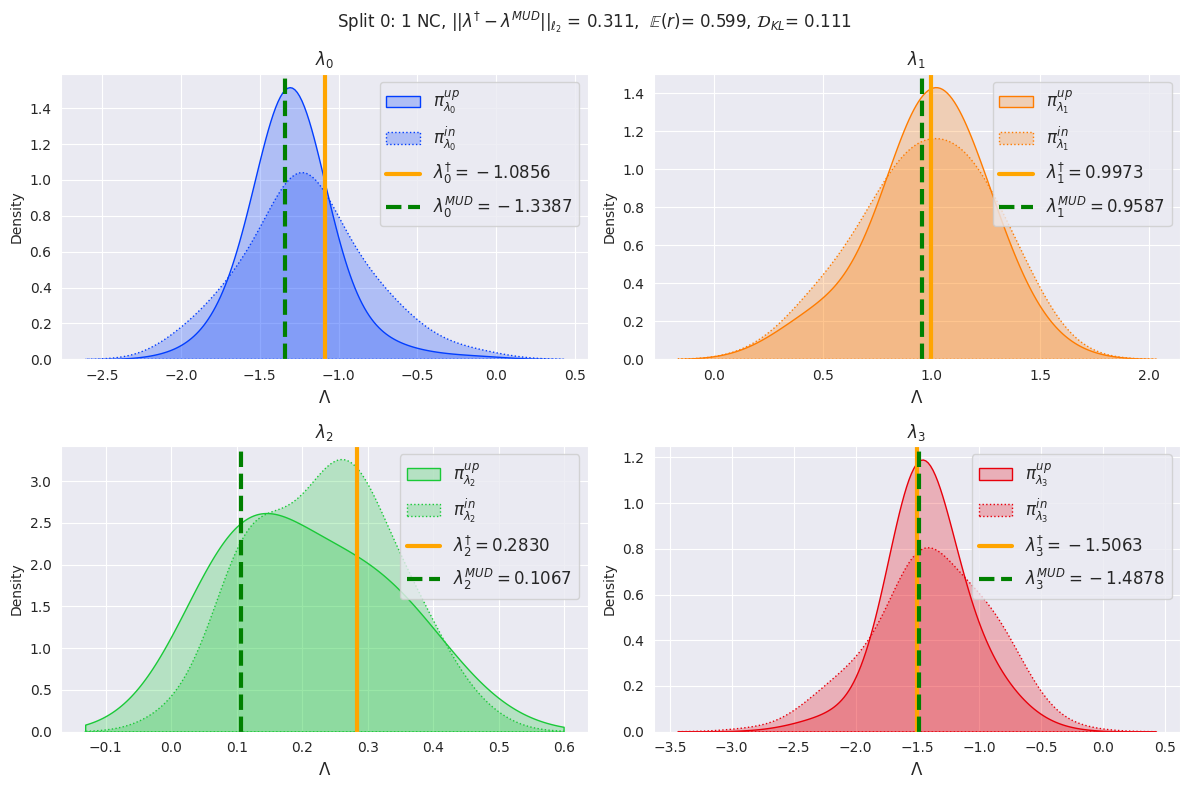

In [15]:
heat_model.probs[-1].param_density_plots(lam_true=heat_model.lam_true)

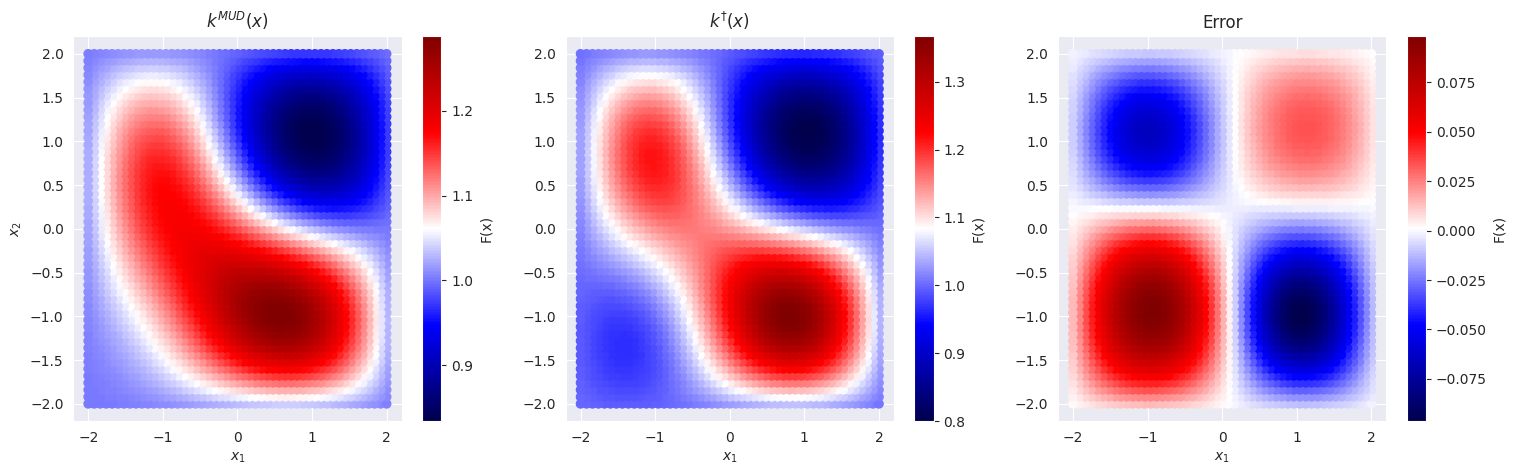

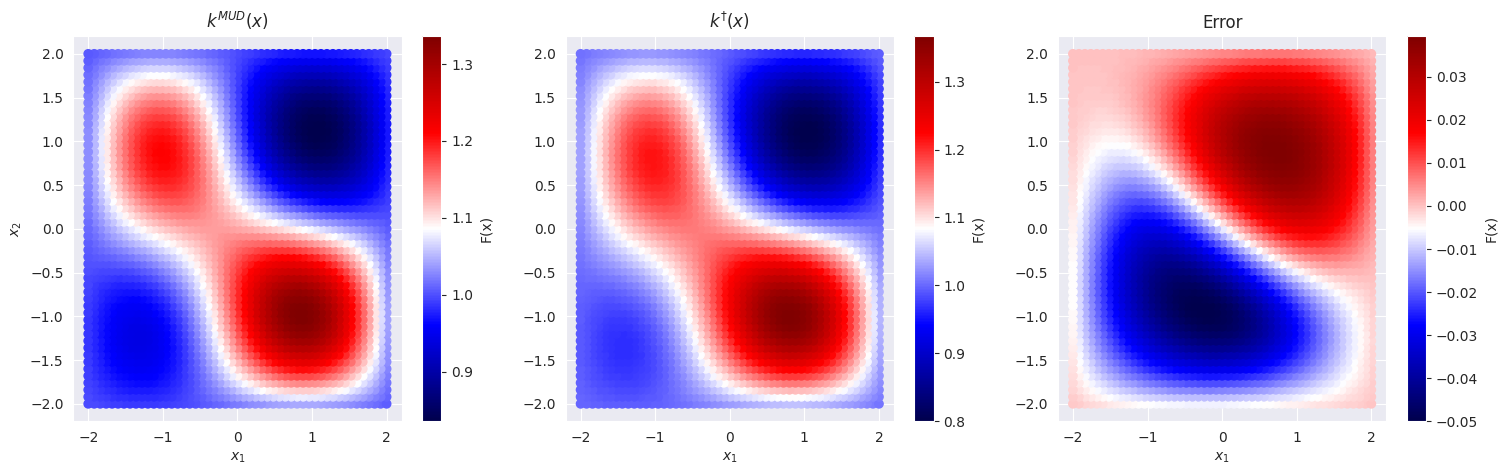

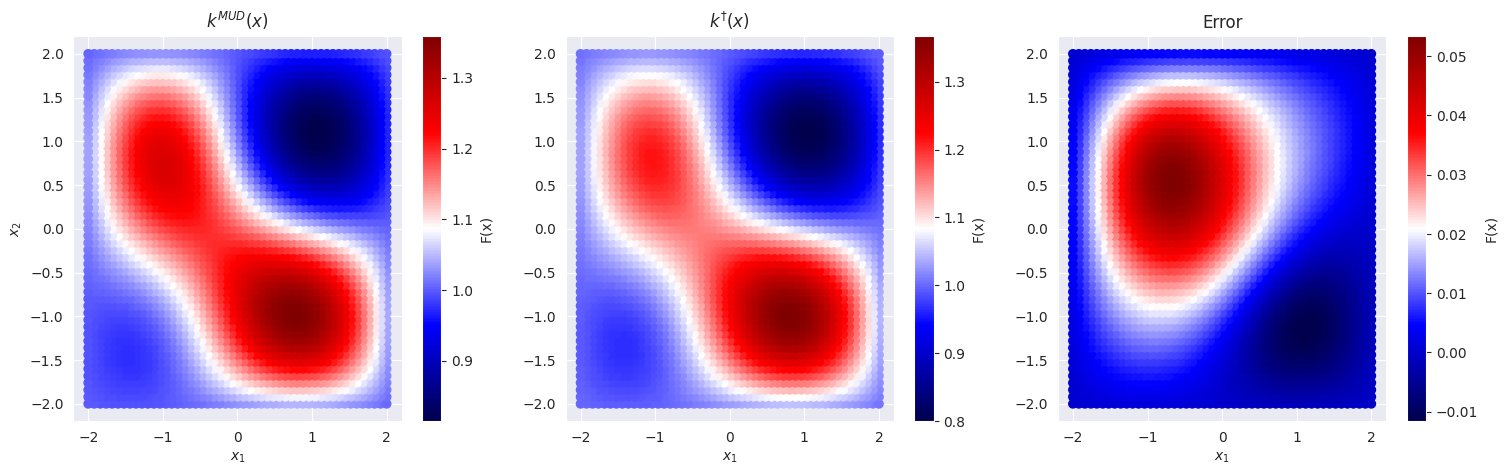

In [52]:
def plot_field_sol(heat_model, iteration=0):
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    heat_model.plot_field(field=heat_model.probs[iteration].mud_point, ax=ax[0])
    ax[0].set_title("$k^{MUD}(x)$")
    heat_model.plot_field(field=heat_model.lam_true, ax=ax[1])
    ax[1].set_title("$k^{\dagger}(x)$")
    ax[1].set_ylabel("")
    heat_model.plot_field(
        field=heat_model.probs[iteration].mud_point, diff=heat_model.lam_true, ax=ax[2]
    )
    ax[2].set_title("Error")
    ax[2].set_ylabel("")
    fig.tight_layout


for i in range(len(heat_model.probs)):
    plot_field_sol(heat_model, iteration=i)

# Num Modes = 10

Increase number of params

In [ ]:
np.random.seed(123)

importlib.reload(hm)
heat_model2 = hm.HeatModel(nmodes=10, max_states=50)
heat_model2.estimate_params([0.1, 0.2, 0.3, 0.4, 0.5], num_samples=100)

[04/21/23 06:13:30] WARNING  Pyvista not found                                                     ]8;id=37718;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=429962;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/examples/heat_model.py#24\24]8;;\

[04/21/23 06:13:36] INFO     Drawing 100 from uniform at:                                              ]8;id=675452;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=246421;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#251\251]8;;\
                                     loc: [-1.6284459   0.49867272  0.14148925 -2.25944207 -0.86790038             
                             0.82571827                                                                            
                              -3.64001887 -0.64336894  0.63296813 -1.3001106 ]                                     
                                     scale: [1.0856306  0.99734545 0.2829785  1.50629471 0.57860025                
                             1.65143654                                                                            
                              2.42667924 0.42891263 1.26593626 0.8667404 ]                                         

                    INFO     Starting iteration from 0.0 to 0.1                                        ]8;id=313636;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=163885;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#502\502]8;;\

[04/21/23 06:13:37] INFO     end_point: 0.0, [ 0.05486596  0.0069361  -0.04177233 ... -0.04220415      ]8;id=540862;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=198414;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#169\169]8;;\
                             -0.09562734                                                                           
                               0.00950829]                                                                         

Solving model sample set: |██████▋             | ▂▂▄ 33/100 [33%] in 27s (~57s, 

In [21]:
heat_model2.probs[-1].split_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2   
split nc qoi_comb                                                        
0     1  0         0.565419  0.394487  -0.716982   1.679628   0.570665  \
      2  0         0.216006  0.524723  -0.590240   1.052694   0.300730   
      3  0         0.100875  0.494597  -0.590240   1.052694   0.300730   
      4  0         0.047903  0.434479  -0.590240   1.052694   0.300730   
      5  0         0.004259  0.525457  -1.180029   0.983414   0.447064   
      6  0         0.000816  1.018789  -0.575421   0.587249   0.040367   
      7  0         0.000460  1.079205  -0.575421   0.587249   0.040367   
      8  0         0.000084  1.540604  -1.098010   0.845948   0.011891   
      9  0         0.000043  1.800293  -1.098010   0.845948   0.011891   
      10 0         0.000014  1.646176  -0.716982   1.679628   0.570665   

                   lam_MUD_3  lam_MUD_4  lam_MUD_5  lam_MUD_6  lam_MUD_7   
split nc qoi_comb                                                          
0     1  0         -1.031287  -0.868979   2.037876  -4.117301  -0.362467  \
      2  0         -2.046628  -0.121896   2.232244  -2.191623  -0.118790   
      3  0         -2.046628  -0.121896   2.232244  -2.191623  -0.118790   
      4  0         -2.046628  -0.121896   2.232244  -2.191623  -0.118790   
      5  0         -0.574936  -0.539496   0.049587  -2.999707  -0.253100   
      6  0         -1.449368  -0.112898   3.304668  -2.442955  -0.456310   
      7  0         -1.449368  -0.112898   3.304668  -2.442955  -0.456310   
      8  0         -1.118476  -0.256675   1.915368  -0.902907  -0.470322   
      9  0         -1.118476  -0.256675   1.915368  -0.902907  -0.470322   
      10 0         -1.031287  -0.868979   2.037876  -4.117301  -0.362467   

                   lam_MUD_8  lam_MUD_9  predict_delta  within_thresh   
split nc qoi_comb                                                       
0     1  0          2.216736  -1.388417       0.434581           True  \
      2  0         -0.138245  -0.208366       0.783994          False   
      3  0         -0.138245  -0.208366       0.899125          False   
      4  0         -0.138245  -0.208366       0.952097          False   
      5  0          1.418394  -1.759890       0.995741          False   
      6  0          0.576993  -0.406242       0.999184          False   
      7  0          0.576993  -0.406242       0.999540          False   
      8  0          2.135069  -0.120351       0.999916          False   
      9  0          2.135069  -0.120351       0.999957          False   
      10 0          2.216736  -1.388417       0.999986          False   

                   closest  max_kl  min_kl  
split nc qoi_comb                           
0     1  0            True    True    True  
      2  0           False   False   False  
      3  0           False   False   False  
      4  0           False   False   False  
      5  0           False   False   False  
      6  0           False   False   False  
      7  0           False   False   False  
      8  0           False   False   False  
      9  0           False   False   False  
      10 0           False   False   False

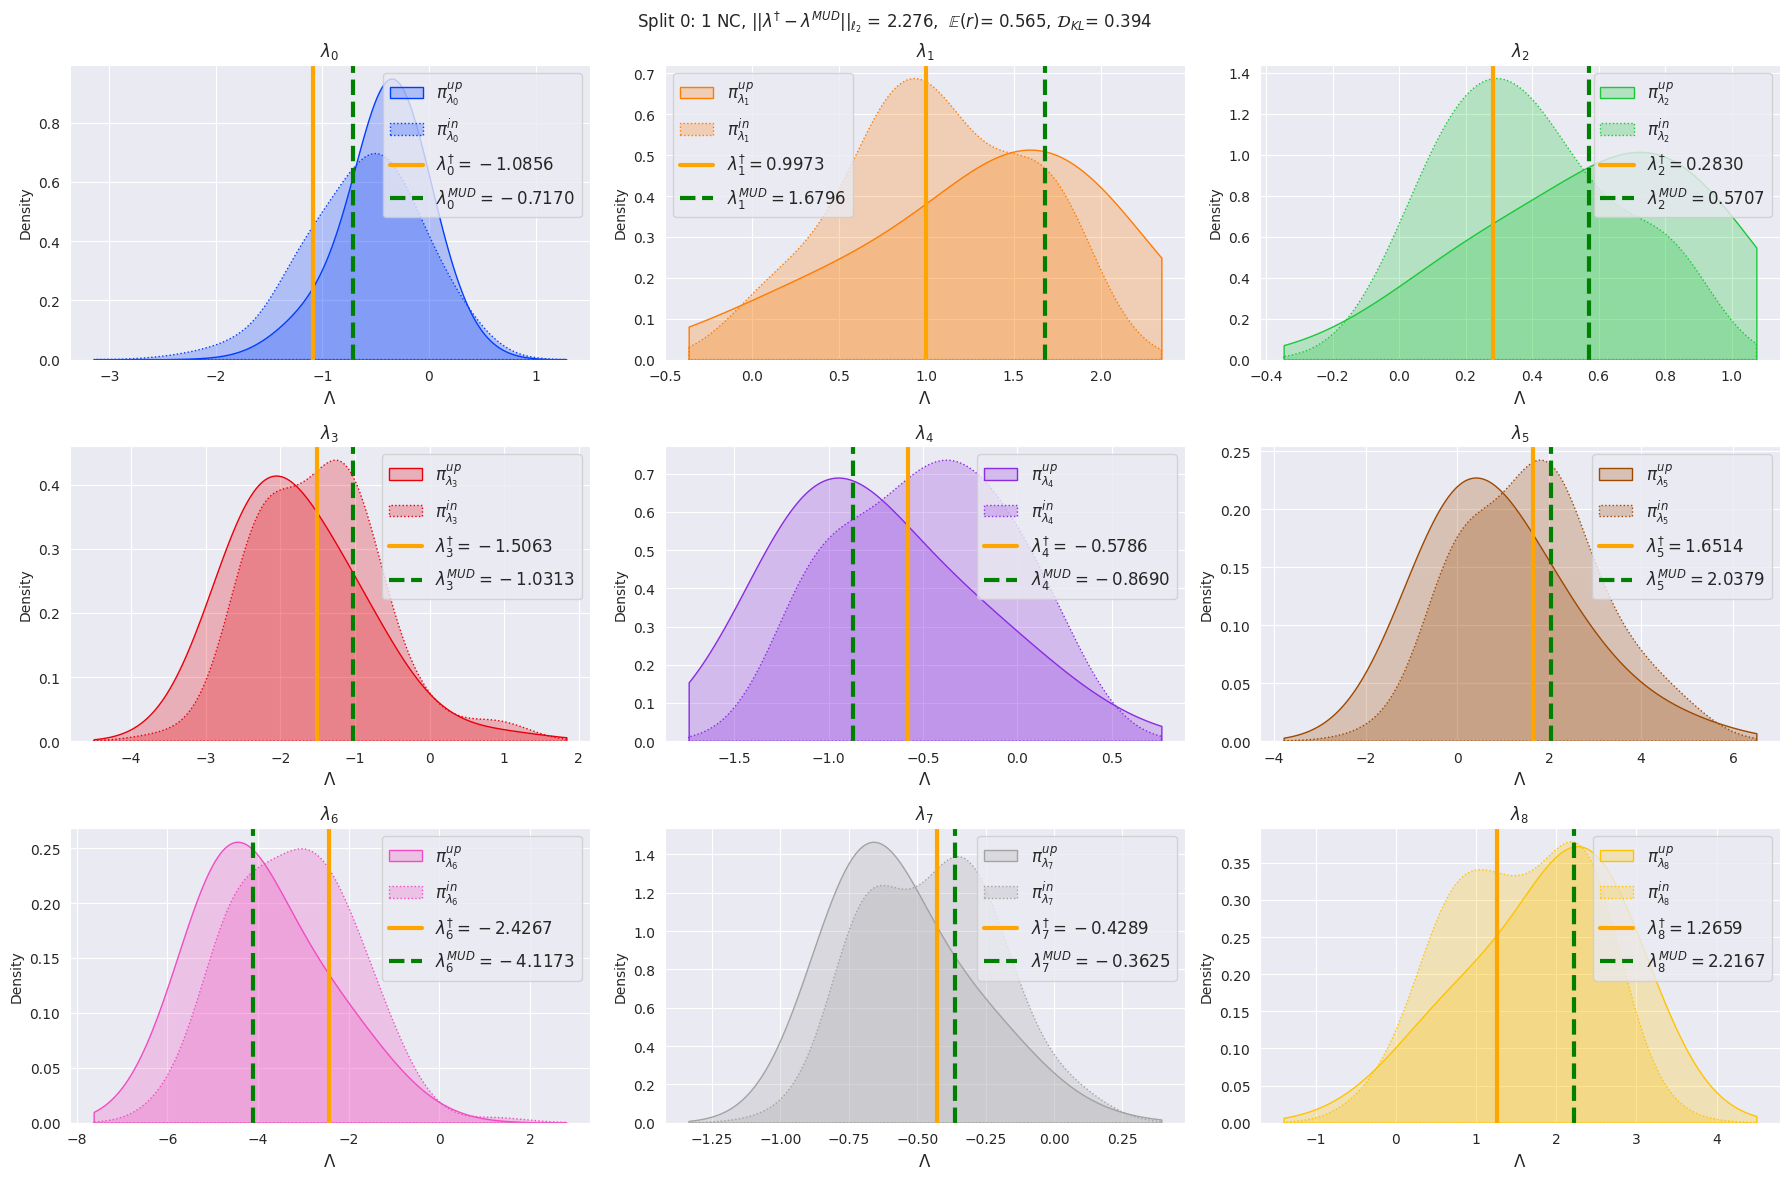

In [43]:
heat_model2.probs[-1].param_density_plots(lam_true=heat_model2.lam_true)

In [29]:
heat_model2.probs[-1].mud_point

array([-0.71698221,  1.67962815,  0.57066484, -1.031287  , -0.86897882,
        2.03787551, -4.11730066, -0.36246691,  2.21673642, -1.38841707])

In [54]:
heat_model2.probs.split_result

AttributeError: 'list' object has no attribute 'split_result'

<bound method Figure.tight_layout of <Figure size 1800x500 with 6 Axes>>

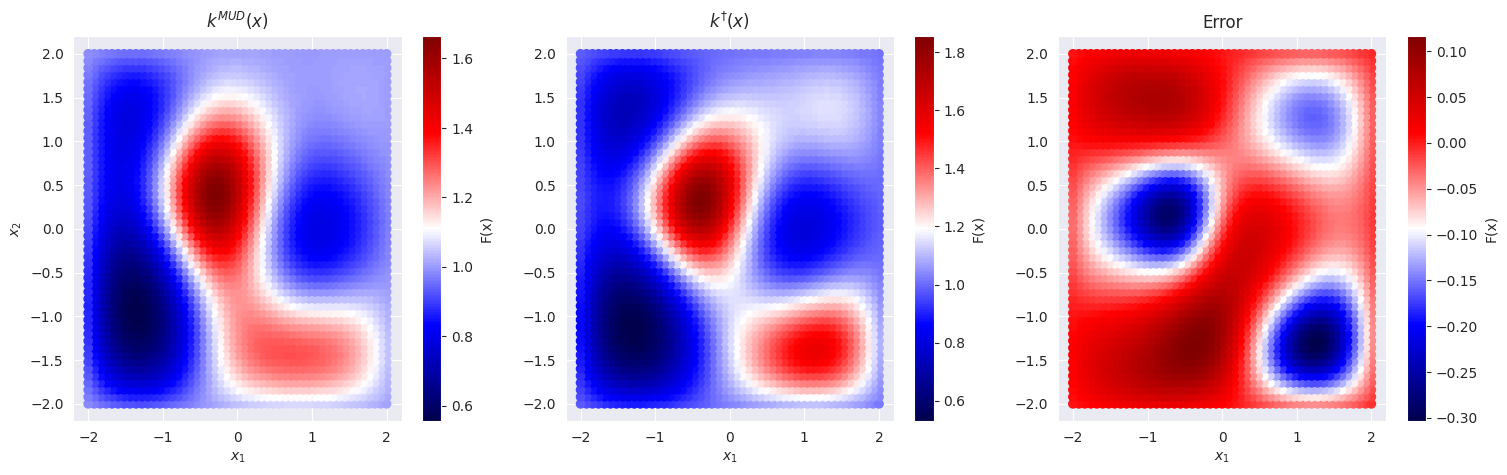

In [44]:
iteration = 0
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
heat_model2.plot_field(field=heat_model2.probs[iteration].mud_point, ax=ax[0])
ax[0].set_title("$k^{MUD}(x)$")
heat_model2.plot_field(field=heat_model2.lam_true, ax=ax[1])
ax[1].set_title("$k^{\dagger}(x)$")
ax[1].set_ylabel("")
heat_model2.plot_field(
    field=heat_model2.probs[iteration].mud_point, diff=heat_model2.lam_true, ax=ax[2]
)
ax[2].set_title("Error")
ax[2].set_ylabel("")
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 1800x500 with 6 Axes>>

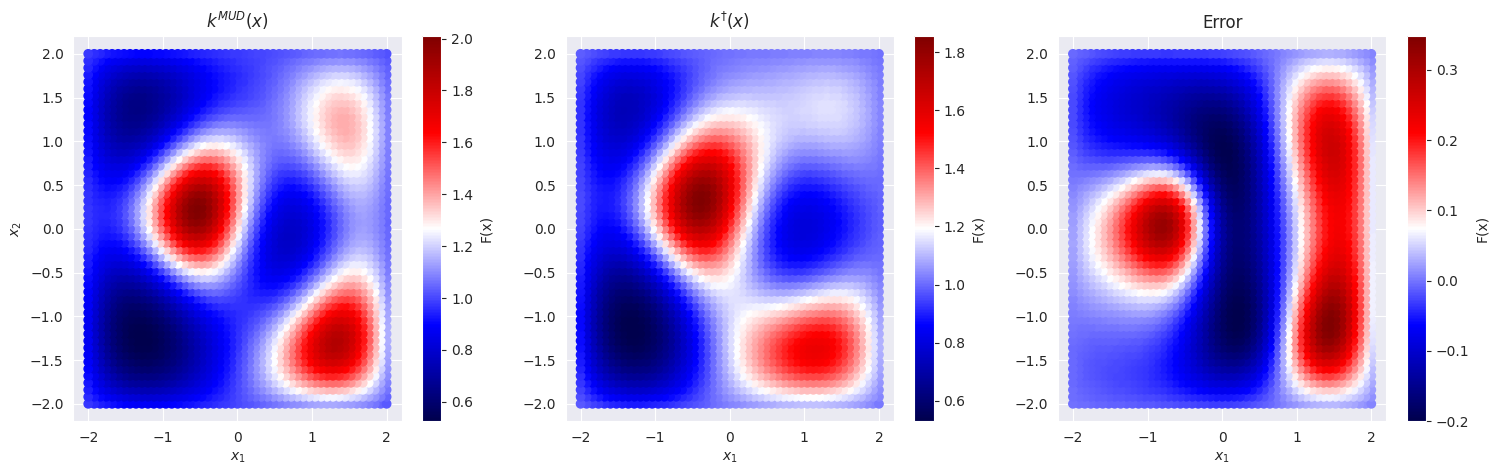

In [47]:
iteration = -2
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
heat_model2.plot_field(field=heat_model2.probs[iteration].mud_point, ax=ax[0])
ax[0].set_title("$k^{MUD}(x)$")
heat_model2.plot_field(field=heat_model2.lam_true, ax=ax[1])
ax[1].set_title("$k^{\dagger}(x)$")
ax[1].set_ylabel("")
heat_model2.plot_field(
    field=heat_model2.probs[iteration].mud_point, diff=heat_model2.lam_true, ax=ax[2]
)
ax[2].set_title("Error")
ax[2].set_ylabel("")
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 1800x500 with 6 Axes>>

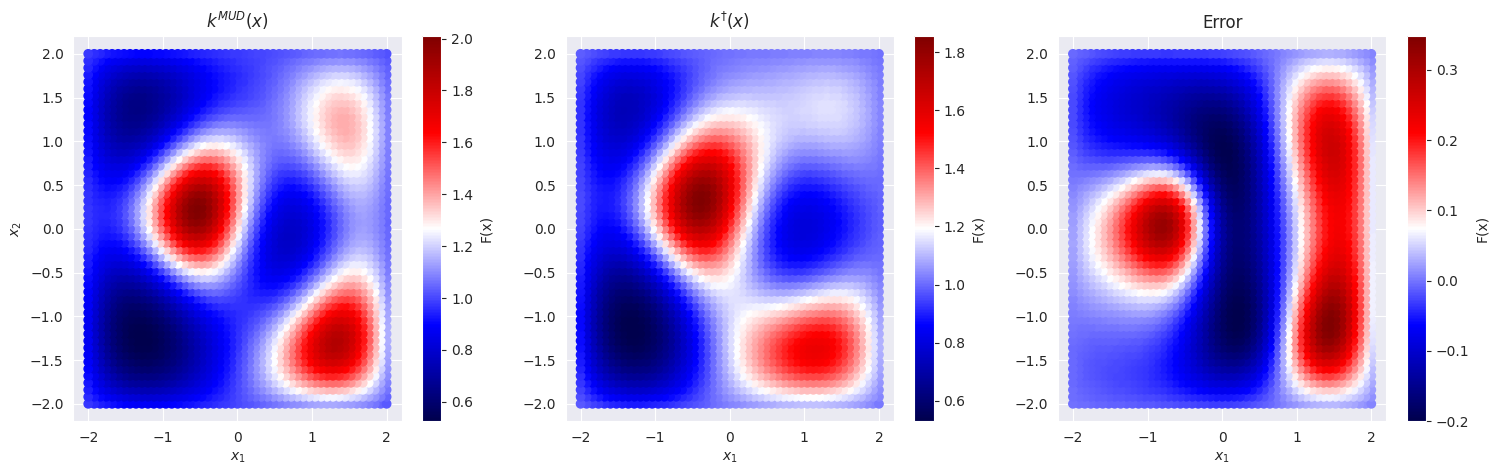

In [47]:
iteration = -1
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
heat_model2.plot_field(field=heat_model2.probs[iteration].mud_point, ax=ax[0])
ax[0].set_title("$k^{MUD}(x)$")
heat_model2.plot_field(field=heat_model2.lam_true, ax=ax[1])
ax[1].set_title("$k^{\dagger}(x)$")
ax[1].set_ylabel("")
heat_model2.plot_field(
    field=heat_model2.probs[iteration].mud_point, diff=heat_model2.lam_true, ax=ax[2]
)
ax[2].set_title("Error")
ax[2].set_ylabel("")
fig.tight_layout

# Generating Ensemble

Old way of generating ensembles using run_samples()

In [40]:
nsamples = 3
params, samples = heat_model.run_samples(nsamples=nsamples)

|████████████████████████████████████████| 3/3 [100%] in 24.4s (0.11/s)         


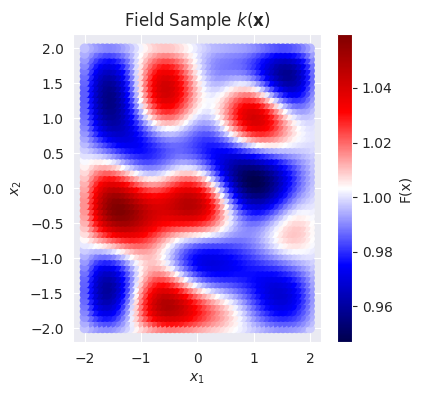

In [41]:
heat_model.plot_field(field=params[0])

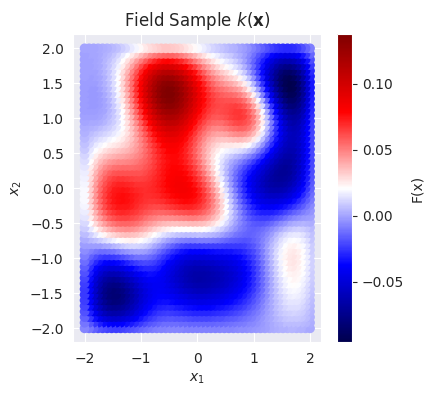

In [42]:
heat_model.plot_field(field=params[0], diff=heat_model.true_params)

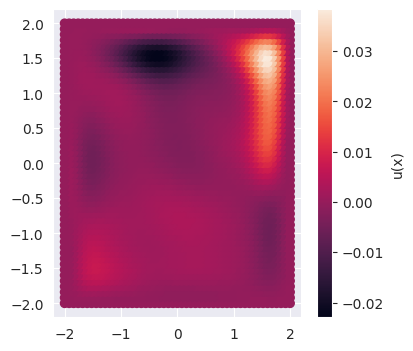

In [45]:
heat_model.plot_solution(samples.loc["s_0"] - sol, idx=10)

# Pyvista Gifs

In [9]:
gif_file = "true_sol.gif"
heat_model.output_gif(sol, gif_file)
Image(url="true_sol.gif")

|███████████████████████████████████████▊⚠︎ (!) 200/201 [100%] in 9.7s (20.60/s)                                         


## Residuals

Lets see the residual between observed and predicted for sample.
Note observed here has no noise yet.

In [12]:
idx = 1
gif_fname = f"s_{idx}.gif"
heat_model.output_gif(samples.loc[f"s_{idx}"], gif_fname, diff=sol)
Image(url=gif_fname)

|███████████████████████████████████████▊⚠︎ (!) 200/201 [100%] in 8.9s (22.44/s)                                         
